In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.lines as mlines
import scipy.stats as stats


%matplotlib inline

# A Look at the Weather in Atlanta, GA From 1997 to 2016
##### Matthew Thomas
##### 12/26/2017
##### Python v3.6

As you're likely aware, [climate change](https://en.wikipedia.org/wiki/Climate_change) has become a hot topic during the 2st century. In this report we'll take a look at some of the different data points collected with regard to the weather in Atlanta, GA from 1997-2016. We will use the data to investigate any trends visible in changing of our local climate. 

Many believe our planet is in fact warming due to our production of greenhouse gase. A warming earth can have various [effects](https://climate.nasa.gov/effects/) on the ecosystems in which we live. It is hypothesised that temperatures are in fact rising and we will investigate any relationships that may exist between the rising temperatures and other weather conditions in our local climate. 

The data used can be found [here](https://en.tutiempo.net/climate/ws-722197.html).

#### Abbreviations found in the data and their meanings:
- T &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Average annual temperature
- TM &nbsp;&nbsp;&nbsp;Annual average maximum temperature
- Tm &nbsp;&nbsp;&nbsp;Average annual minimum temperature
- PP &nbsp;&nbsp;&nbsp;Rain or snow precipitation total annual
- V &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Annual average wind speed
- RA &nbsp;&nbsp;&nbsp;Number of days with rain
- SN &nbsp;&nbsp;&nbsp;Number of days with snow
- TS &nbsp;&nbsp;&nbsp;Number of days with storm
- FG &nbsp;&nbsp;&nbsp;Number of foggy days
- TN &nbsp;&nbsp;&nbsp;Number of days with tornado
- GR &nbsp;&nbsp;&nbsp;Number of days with hail

#### Raw data from 1997 to 2016

In [5]:
weather = pd.read_csv('weather.csv')
weather

,Year,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR
0,1996.0,-,-,-,-,-,-,-,-,-,-,-
1,1997.0,15.3,21.8,9.6,805.64,7.1,122,4,2,25,0,0
2,1998.0,16.6,24.2,10,1161.06,6.9,113,1,0,25,0,0
3,1999.0,16,24.3,8.7,-,6.6,107,0,1,28,0,0
4,2000.0,15.4,23.7,8,-,6.5,103,6,33,21,0,0
5,2001.0,15.5,23.5,8.4,-,-,112,1,55,18,0,0
6,2002.0,-,-,-,-,-,-,-,-,-,-,-
7,2003.0,15.6,23,9.2,-,6.7,130,0,69,3,0,0
8,2004.0,15.6,23.1,8.8,1119.4,5.4,120,0,63,42,0,0
9,2005.0,-,-,-,-,-,-,-,-,-,-,-


## Investigating Temperature and its effect on the number of Rainy Days

#### First we're going to focus on the following data points:
- Average Temp (T)
- Average Max Temp (TM)
- Average Min Temp (Tm)
- Number of days it rained (RA)

Before we can visualize the data we'll need to clean it up a bit.

In [6]:
# 1996, 2002 and 2005 are missing data for each of the
# data points so I'll remove those rows
# The final row is irrelevant so it is removed as well
weather = weather.iloc[1:,:10]
weather = weather.drop(weather.index[5])
weather = weather.drop(weather.index[7])
weather = weather.drop(weather.index[18])

# the values are type string so we'll convert them accordingly
weather['Year'] = weather['Year'].astype(int)
weather['T'] = weather['T'].astype(float)
weather['TM'] = weather['TM'].astype(float)
weather['Tm'] = weather['Tm'].astype(float)
weather['RA'] = weather['RA'].astype(int)

# lets take a look to make sure no other changes occurred
weather

,Year,T,TM,Tm,PP,V,RA,SN,TS,FG
1,1997,15.3,21.8,9.6,805.64,7.1,122,4,2,25
2,1998,16.6,24.2,10.0,1161.06,6.9,113,1,0,25
3,1999,16.0,24.3,8.7,-,6.6,107,0,1,28
4,2000,15.4,23.7,8.0,-,6.5,103,6,33,21
5,2001,15.5,23.5,8.4,-,-,112,1,55,18
7,2003,15.6,23.0,9.2,-,6.7,130,0,69,3
8,2004,15.6,23.1,8.8,1119.4,5.4,120,0,63,42
10,2006,16.0,23.3,9.8,950.32,5.8,126,3,70,29
11,2007,16.2,23.7,9.7,797.72,5.2,105,3,46,22
12,2008,15.8,23.1,9.7,1003.97,5.7,121,3,57,21


#### Next we can normalize each of the columns to their respective maxes
This will allow us to visualize their data in the same frame of reference

In [7]:
#weather['T_norm']
T_normed = []
for t in weather['T']:
    t = float(t) / weather['T'].max()
    T_normed.append(round(t, 3))

#weather['TM_norm']
TM_normed = []
for t in weather['TM']:
    t = float(t) / weather['TM'].max()
    TM_normed.append(round(t, 3))
    
#weather['Tm_norm']
Tm_normed = []
for t in weather['Tm']:
    t = float(t) / weather['Tm'].max()
    Tm_normed.append(round(t, 3))
    
#weather['RA_norm']
RA_normed = []
for r in weather['RA']:
    r = float(r) / weather['RA'].max()
    RA_normed.append(round(r, 3))

# here  we'll define the new columns
weather['T_normed'] = T_normed
weather['TM_normed'] = TM_normed
weather['Tm_normed'] = Tm_normed
weather['RA_normed'] = RA_normed

# now we can check to ensure the new columns were added
weather

,Year,T,TM,Tm,PP,V,RA,SN,TS,FG,T_normed,TM_normed,Tm_normed,RA_normed
1,1997,15.3,21.8,9.6,805.64,7.1,122,4,2,25,0.900,0.865,0.873,0.813
2,1998,16.6,24.2,10.0,1161.06,6.9,113,1,0,25,0.976,0.960,0.909,0.753
3,1999,16.0,24.3,8.7,-,6.6,107,0,1,28,0.941,0.964,0.791,0.713
4,2000,15.4,23.7,8.0,-,6.5,103,6,33,21,0.906,0.940,0.727,0.687
5,2001,15.5,23.5,8.4,-,-,112,1,55,18,0.912,0.933,0.764,0.747
7,2003,15.6,23.0,9.2,-,6.7,130,0,69,3,0.918,0.913,0.836,0.867
8,2004,15.6,23.1,8.8,1119.4,5.4,120,0,63,42,0.918,0.917,0.800,0.800
10,2006,16.0,23.3,9.8,950.32,5.8,126,3,70,29,0.941,0.925,0.891,0.840
11,2007,16.2,23.7,9.7,797.72,5.2,105,3,46,22,0.953,0.940,0.882,0.700
12,2008,15.8,23.1,9.7,1003.97,5.7,121,3,57,21,0.929,0.917,0.882,0.807


### Visualizions

##### We'll use subplots to create each of the visualizations we're interested in all at once
- Average temperature
- Average minimum temperature
- Average maximum temperature
- Number of rainy days

##### We'll also perform the following calculations for each of the indivual data points
- Best fit line
- r 
    - [Coefficient of Correlation](https://en.wikipedia.org/wiki/Correlation_coefficient)
    - this is a measure of the strength and direction of the linear relationship between the two variables
- r-squared 
    - [Coefficient of Determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)
    - briefly described as the measure of how well the data points fit the line (measure of variance)

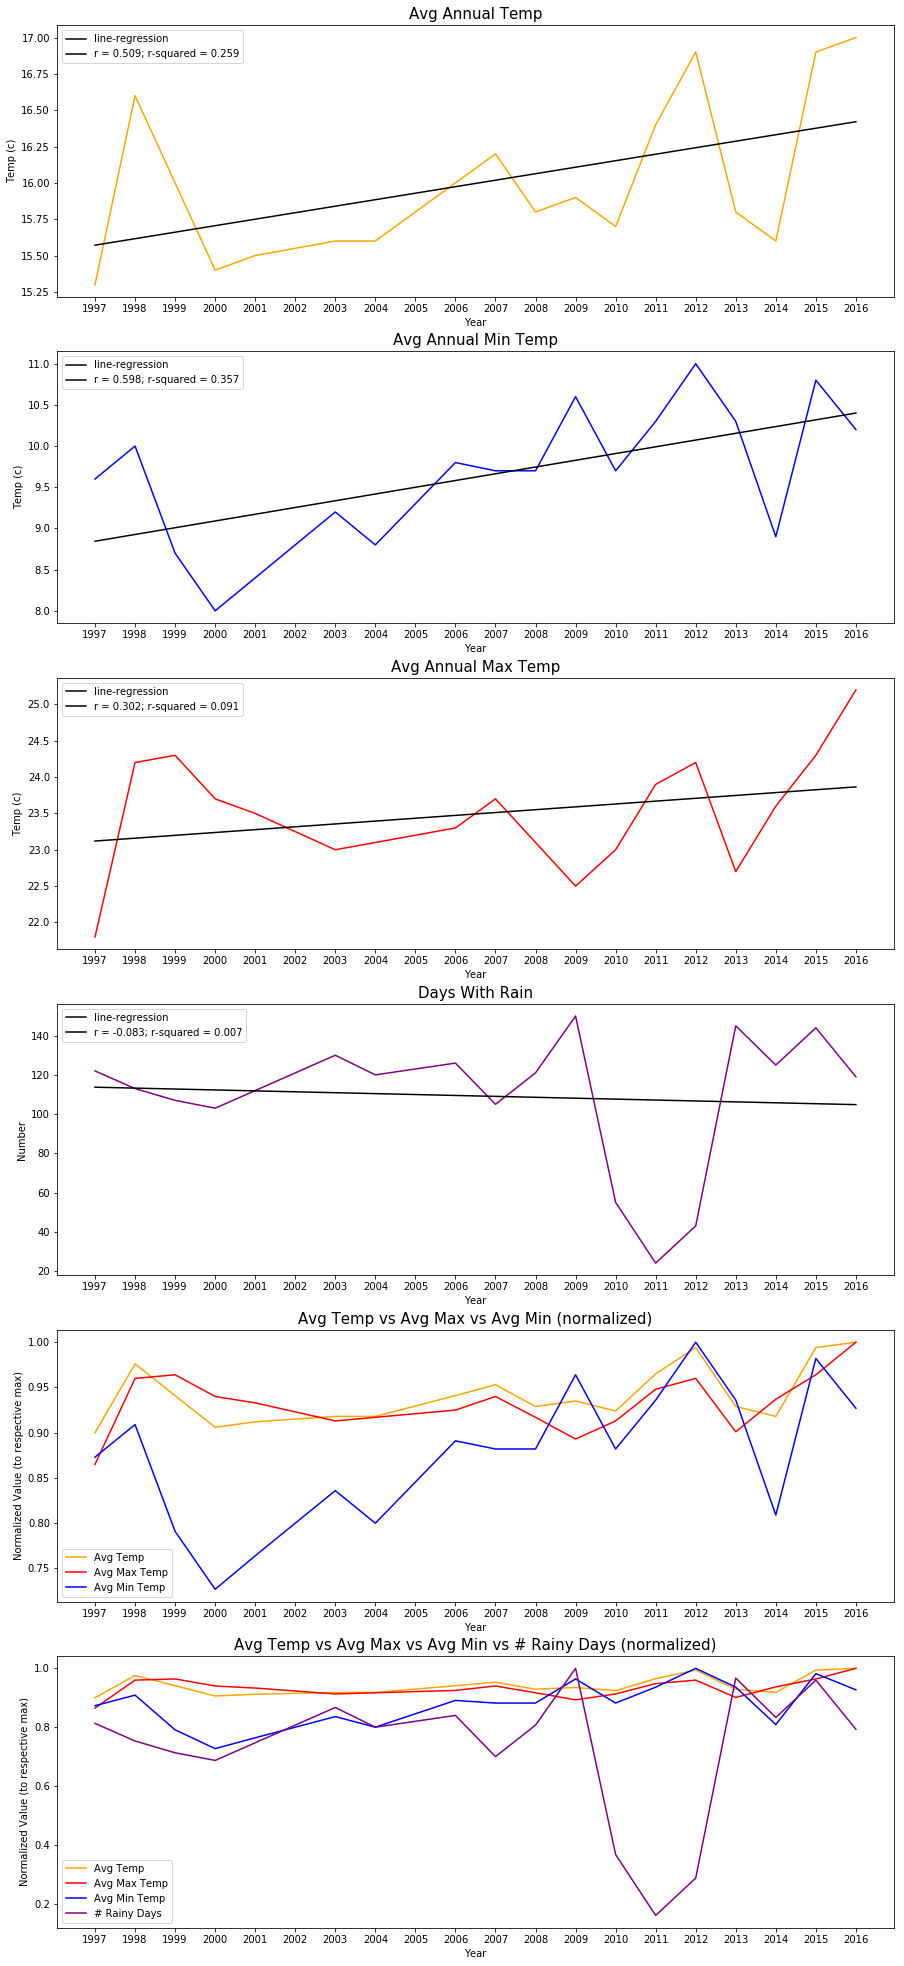

In [8]:
############################################
# Average temp, T
plt.figure(figsize=(15, 35))

plt.subplot(611)
plt.plot(weather['Year'],weather['T'], color='orange')
plt.ylabel('Temp (c)')
plt.xlabel('Year')
plt.title('Avg Annual Temp', fontsize=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(weather['Year'],weather['T'])

line_regression = intercept + slope * weather['Year']

plt.plot(weather['Year'], line_regression, 'k-')

rval_atemp = mlines.Line2D([], [], color = 'black', label='line-regression')
rsquared_atemp = mlines.Line2D([], [], color = 'black',
                               label='r = {}; r-squared = {}'.format(round(r_value, 3),round(r_value**2, 3)))

plt.legend(handles=[rval_atemp, rsquared_atemp])

xtickpos = np.arange(1997,2017,1)
plt.xticks(xtickpos,xtickpos)
############################################
# Average min temp, Tm
plt.subplot(612)
plt.plot(weather['Year'],weather['Tm'], color='blue')
plt.ylabel('Temp (c)')
plt.xlabel('Year')
plt.title('Avg Annual Min Temp', fontsize=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(weather['Year'],weather['Tm'])

line_regression = intercept + slope * weather['Year']

plt.plot(weather['Year'], line_regression, 'k-')

rval_amintemp = mlines.Line2D([], [], color = 'black', label='line-regression')
rsquared_amintemp = mlines.Line2D([], [], color = 'black', 
                                  label='r = {}; r-squared = {}'.format(round(r_value, 3),round(r_value**2, 3)))

plt.legend(handles=[rval_amintemp, rsquared_amintemp])

xtickpos = np.arange(1997,2017,1)
plt.xticks(xtickpos,xtickpos)

############################################
# Average max temp, TM
plt.subplot(613)
plt.plot(weather['Year'],weather['TM'], color='red')
plt.ylabel('Temp (c)')
plt.xlabel('Year')
plt.title('Avg Annual Max Temp', fontsize=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(weather['Year'],weather['TM'])

line_regression = intercept + slope * weather['Year']

plt.plot(weather['Year'], line_regression, 'k-')

rval_amaxtemp = mlines.Line2D([], [], color = 'black', label='line-regression')
rsquared_amaxtemp = mlines.Line2D([], [], color = 'black', 
                                  label='r = {}; r-squared = {}'.format(round(r_value, 3),round(r_value**2, 3)))

plt.legend(handles=[rval_amaxtemp, rsquared_amaxtemp])

xtickpos = np.arange(1997,2017,1)
plt.xticks(xtickpos,xtickpos)

############################################
# Number of rainy days, RA
plt.subplot(614)
plt.plot(weather['Year'],weather['RA'], color='purple')
plt.ylabel('Number')
plt.xlabel('Year')
plt.title('Days With Rain', fontsize=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(weather['Year'],weather['RA'])

line_regression = intercept + slope * weather['Year']

plt.plot(weather['Year'], line_regression, 'k-')

rval_daysrained = mlines.Line2D([], [], color = 'black', label='line-regression')
rsquared_daysrained = mlines.Line2D([], [], color = 'black', 
                                    label='r = {}; r-squared = {}'.format(round(r_value, 3),round(r_value**2, 3)))

plt.legend(handles=[rval_daysrained, rsquared_daysrained])

xtickpos = np.arange(1997,2017,1)
plt.xticks(xtickpos,xtickpos)

############################################
# Avg Temp vs Avg Max Temp vs Avg Min normalized to their respective maxes
plt.subplot(615)
plt.plot(weather['Year'],weather['T_normed'], color='orange')
plt.plot(weather['Year'],weather['TM_normed'], color='red')
plt.plot(weather['Year'],weather['Tm_normed'], color='blue')

atemp_label = mlines.Line2D([], [], color='orange', label='Avg Temp')
amaxtemp_label = mlines.Line2D([], [], color='red', label='Avg Max Temp')
amintemp_label = mlines.Line2D([], [], color='blue', label='Avg Min Temp')

plt.legend(handles=[atemp_label, amaxtemp_label, amintemp_label])

plt.ylabel('Normalized Value (to respective max)')
plt.xlabel('Year')
plt.title('Avg Temp vs Avg Max vs Avg Min (normalized)', fontsize=15)

xtickpos = np.arange(1997,2017,1)
plt.xticks(xtickpos,xtickpos)

############################################
# each of the data points normalized to their respective maxes
plt.subplot(616)
plt.plot(weather['Year'],weather['T_normed'], color='orange', label='Avg Temp')
plt.plot(weather['Year'],weather['TM_normed'], color='red')
plt.plot(weather['Year'],weather['Tm_normed'], color='blue')
plt.plot(weather['Year'],weather['RA_normed'], color='purple')

plt.ylabel('Normalized Value (to respective max)')
plt.xlabel('Year')
plt.title('Avg Temp vs Avg Max vs Avg Min vs # Rainy Days (normalized)', fontsize=15)

rdays_label = mlines.Line2D([], [], color='purple', label='# Rainy Days')
plt.legend(handles=[atemp_label, amaxtemp_label, amintemp_label, rdays_label])

xtickpos = np.arange(1997,2017,1)
plt.xticks(xtickpos,xtickpos)

plt.show()

#### Rainy Days vs Temperature Data

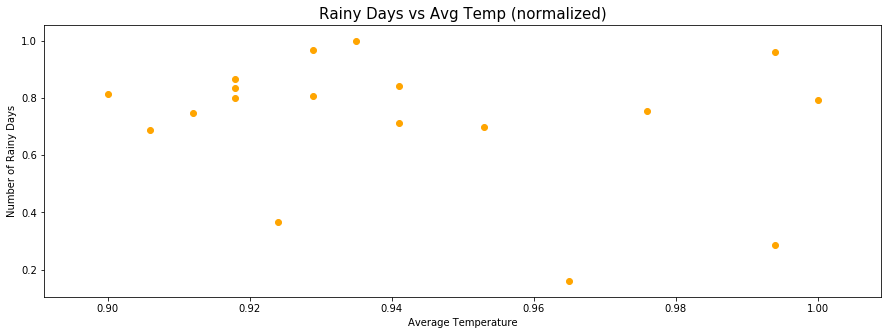

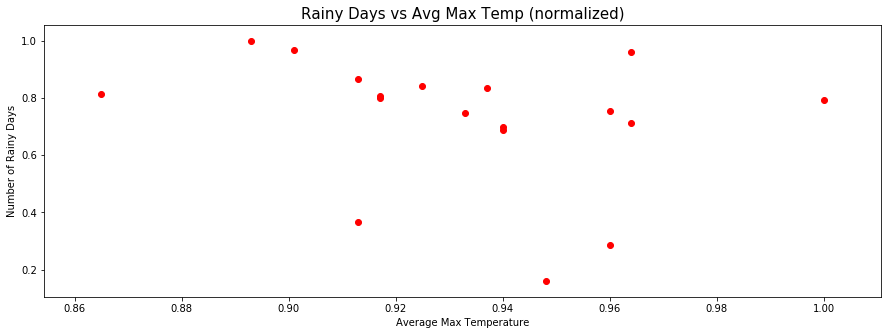

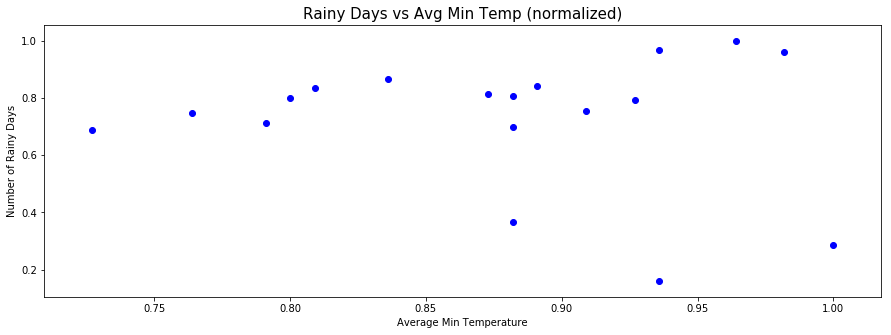

In [29]:
############################################
# avg temp vs rainy days
plt.figure(figsize=(15, 35))

plt.subplot(611)
plt.scatter(weather['T_normed'],weather['RA_normed'], color='orange')

plt.ylabel('Number of Rainy Days')
plt.xlabel('Average Temperature')
plt.title('Rainy Days vs Avg Temp (normalized)', fontsize=15)

############################################
# avg max temp vs rainy days
plt.figure(figsize=(15, 35))

plt.subplot(612)
plt.scatter(weather['TM_normed'],weather['RA_normed'], color='red')

plt.ylabel('Number of Rainy Days')
plt.xlabel('Average Max Temperature')
plt.title('Rainy Days vs Avg Max Temp (normalized)', fontsize=15)

############################################
# avg max temp vs rainy days
plt.figure(figsize=(15, 35))

plt.subplot(612)
plt.scatter(weather['Tm_normed'],weather['RA_normed'], color='blue')

plt.ylabel('Number of Rainy Days')
plt.xlabel('Average Min Temperature')
plt.title('Rainy Days vs Avg Min Temp (normalized)', fontsize=15)

############################################

plt.show()

### Observations

The average temperature, average max temperature, and average min temperature all have positive lines of regression so the data suggests the temperatures are rising over time. 
 - It is important to note the r-squared values are relatively small, meaning there is high variance. This could suggest
      there is not enough data to come to a more solid conclusion.

With regard to the number of rainy days per year, the negative trend would suggest we are seeing less rain.
 - However, between the years of 2010-2012 we can see a considerable dip in the number of days it rained.
     - This suggests further analysis is required in order to confirm whether or not it is raining less.  
 
When we graph temperature to the number of rainy days there seems to be an evident trend that it rains more when temperatures are warmer. Thus, perhaps we should expect more rain as temperatures rise. 

## Further Analysis of Precipitation 
Below we'll perform some further analysis to test the apparent negative trend in rainy days and overall rain.

In [31]:
weather_pp = weather

weather_pp

,Year,T,TM,Tm,PP,V,RA,SN,TS,FG,T_normed,TM_normed,Tm_normed,RA_normed
1,1997,15.3,21.8,9.6,805.64,7.1,122,4,2,25,0.900,0.865,0.873,0.813
2,1998,16.6,24.2,10.0,1161.06,6.9,113,1,0,25,0.976,0.960,0.909,0.753
3,1999,16.0,24.3,8.7,-,6.6,107,0,1,28,0.941,0.964,0.791,0.713
4,2000,15.4,23.7,8.0,-,6.5,103,6,33,21,0.906,0.940,0.727,0.687
5,2001,15.5,23.5,8.4,-,-,112,1,55,18,0.912,0.933,0.764,0.747
7,2003,15.6,23.0,9.2,-,6.7,130,0,69,3,0.918,0.913,0.836,0.867
8,2004,15.6,23.1,8.8,1119.4,5.4,120,0,63,42,0.918,0.917,0.800,0.800
10,2006,16.0,23.3,9.8,950.32,5.8,126,3,70,29,0.941,0.925,0.891,0.840
11,2007,16.2,23.7,9.7,797.72,5.2,105,3,46,22,0.953,0.940,0.882,0.700
12,2008,15.8,23.1,9.7,1003.97,5.7,121,3,57,21,0.929,0.917,0.882,0.807


In [32]:
# we'll take a look at the the PP and RA, their norms, and the pp/days rained -- also look at box and whiskers plot

In [33]:
# First we'll have to clean up some of the precipitation data
# From 1999-2003 and 2005 there was not a value reported so we'll remove them
# Also, since we are looking at Snow/Rain Precipitation, we'll need to add in 
# the number of days it snowed as well
weather_pp = weather
weather_pp = weather_pp.drop(weather_pp.index[2])
weather_pp = weather_pp.drop(weather_pp.index[2])
weather_pp = weather_pp.drop(weather_pp.index[2])
weather_pp = weather_pp.drop(weather_pp.index[2])
weather_pp = weather_pp.drop(columns=['V', 'TS', 'FG'])

weather_pp['PP'] = weather_pp['PP'].astype(float)
weather_pp['SN'] = weather_pp['SN'].astype(int)

# and we'll also normalize the data for comparison
#weather_pp['PP_norm']
PP_normed = []
for p in weather_pp['PP']:
    p = float(p) / weather_pp['PP'].max()
    PP_normed.append(round(p, 3))

# normalized snow days
SN_normed = []
for d in weather_pp['SN']:
    d = float(d)/weather_pp['SN'].max()
    SN_normed.append(round(d, 3))

# here  we'll define the new normalized columns just made
weather_pp['PP_normed'] = PP_normed
weather_pp['SN_normed'] = SN_normed

# here we'll add the two types of precipitation days together
# as well as normalize the data
weather_pp['PP_days'] = weather_pp['RA'] + weather_pp['SN']

PP_days_normed = []
for d in weather_pp['PP_days']:
    d = float(d) / weather_pp['PP_days'].max()
    PP_days_normed.append(round(d, 3))
    
# here will add it
weather_pp['PP_days_normed'] = PP_days_normed

# here we'll look at the ratio of Precipitation to Rainy/Snow days
# and normalize it
weather_pp['PP/PP_days'] = round(weather_pp['PP'] / weather_pp['PP_days'], 3)

PP_to_PP_days_normed = []
for r in weather_pp['PP/PP_days']:
    r = float(r) / weather_pp['PP/PP_days'].max()
    PP_to_PP_days_normed.append(round(r, 3))

# here  we'll define the new column
weather_pp['PP/PP_days__normed'] = PP_to_PP_days_normed

weather_pp

,Year,T,TM,Tm,PP,RA,SN,T_normed,TM_normed,Tm_normed,RA_normed,PP_normed,SN_normed,PP_days,PP_days_normed,PP/PP_days,PP/PP_days__normed
1,1997,15.3,21.8,9.6,805.64,122,4,0.900,0.865,0.873,0.813,0.457,0.4,126,0.829,6.394,0.151
2,1998,16.6,24.2,10.0,1161.06,113,1,0.976,0.960,0.909,0.753,0.659,0.1,114,0.750,10.185,0.240
8,2004,15.6,23.1,8.8,1119.40,120,0,0.918,0.917,0.800,0.800,0.635,0.0,120,0.789,9.328,0.220
10,2006,16.0,23.3,9.8,950.32,126,3,0.941,0.925,0.891,0.840,0.539,0.3,129,0.849,7.367,0.174
11,2007,16.2,23.7,9.7,797.72,105,3,0.953,0.940,0.882,0.700,0.453,0.3,108,0.711,7.386,0.174
12,2008,15.8,23.1,9.7,1003.97,121,3,0.929,0.917,0.882,0.807,0.570,0.3,124,0.816,8.097,0.191
13,2009,15.9,22.5,10.6,1603.87,150,2,0.935,0.893,0.964,1.000,0.910,0.2,152,1.000,10.552,0.249
14,2010,15.7,23.0,9.7,1229.96,55,10,0.924,0.913,0.882,0.367,0.698,1.0,65,0.428,18.922,0.446
15,2011,16.4,23.9,10.3,1144.37,24,3,0.965,0.948,0.936,0.160,0.650,0.3,27,0.178,42.384,1.000
16,2012,16.9,24.2,11.0,1053.51,43,0,0.994,0.960,1.000,0.287,0.598,0.0,43,0.283,24.500,0.578


### Visualizations Based on Precipitation Data

##### Like before we'll use subplots to create each of the visualizations we're interested in all at once
- Precipitation (in inches)
- Number of rainy days
- Number of snow days
- Number of days with precipitation
- Ratio of total precipitation to the number od days with precipitation
- and finally each of the data points normalized to each of their respective maxes

##### We'll also perform the same calculations as beforfe for each of the individual data points
- Best fit line
- r 
    - [Coefficient of Correlation](https://en.wikipedia.org/wiki/Correlation_coefficient)
    - this is a measure of the strength and direction of the linear relationship between the two variables
- r-squared 
    - [Coefficient of Determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)
    - briefly described as the measure of how well the data points fit the line (measure of variance)

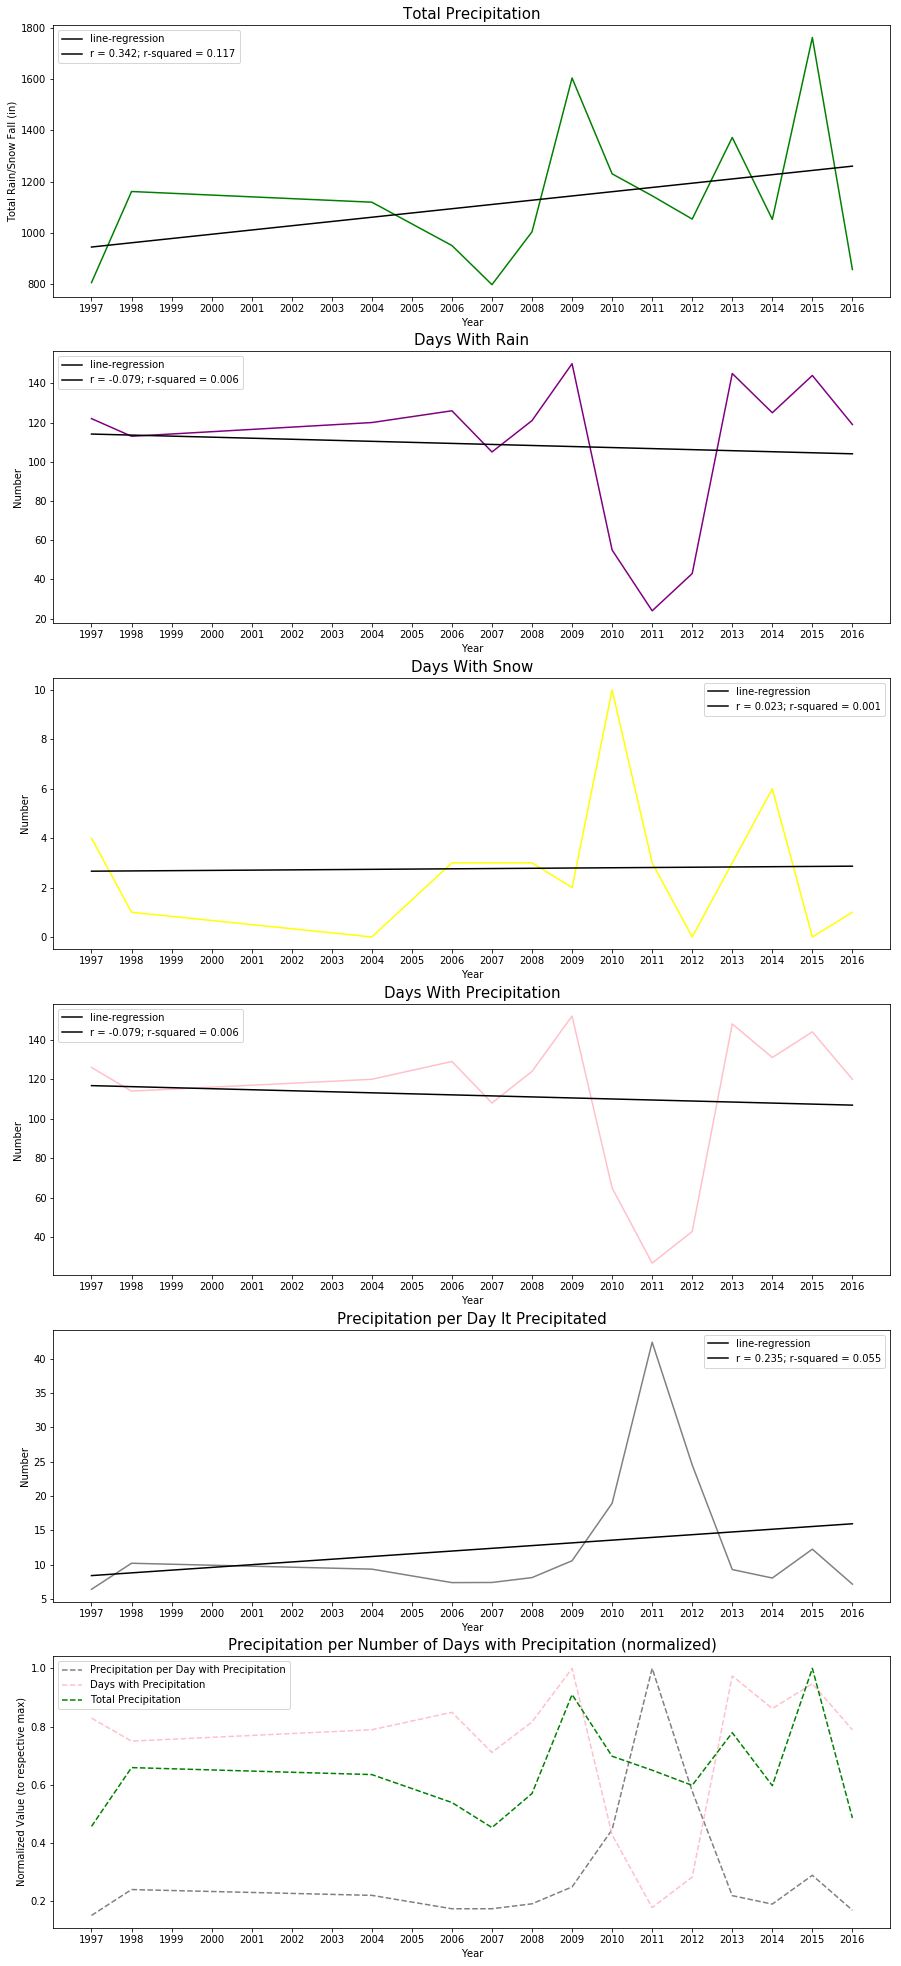

In [34]:
############################################
# precipitation, PP
plt.figure(figsize=(15, 35))

plt.subplot(611)
plt.plot(weather_pp['Year'],weather_pp['PP'], color='green')
plt.ylabel('Total Rain/Snow Fall (in)')
plt.xlabel('Year')
plt.title('Total Precipitation', fontsize=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(weather_pp['Year'],weather_pp['PP'])

line_regression = intercept + slope * weather_pp['Year']

plt.plot(weather_pp['Year'], line_regression, 'k-')

rval_pp = mlines.Line2D([], [], color = 'black', label='line-regression')
rsquared_pp = mlines.Line2D([], [], color='black', 
                            label='r = {}; r-squared = {}'.format(round(r_value, 3),round(r_value**2, 3)))

plt.legend(handles=[rval_pp, rsquared_pp])

xtickpos = np.arange(1997,2017,1)
plt.xticks(xtickpos,xtickpos)

############################################
# Number of rainy days, RA (from the weather_pp data set)
plt.subplot(612)
plt.plot(weather_pp['Year'],weather_pp['RA'], color='purple')
plt.ylabel('Number')
plt.xlabel('Year')
plt.title('Days With Rain', fontsize=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(weather_pp['Year'],weather_pp['RA'])

line_regression = intercept + slope * weather_pp['Year']

plt.plot(weather_pp['Year'], line_regression, 'k-')

rval_daysrained = mlines.Line2D([], [], color = 'black', label='line-regression')
rsquared_daysrained = mlines.Line2D([], [], color = 'black', 
                                    label='r = {}; r-squared = {}'.format(round(r_value, 3),round(r_value**2, 3)))

plt.legend(handles=[rval_daysrained, rsquared_daysrained])

xtickpos = np.arange(1997,2017,1)
plt.xticks(xtickpos,xtickpos)

############################################
# Number of snow days, SN (from the weather_pp data set)
plt.subplot(613)
plt.plot(weather_pp['Year'],weather_pp['SN'], color='yellow')
plt.ylabel('Number')
plt.xlabel('Year')
plt.title('Days With Snow', fontsize=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(weather_pp['Year'],weather_pp['SN'])

line_regression = intercept + slope * weather_pp['Year']

plt.plot(weather_pp['Year'], line_regression, 'k-')

rval_dayssnowed = mlines.Line2D([], [], color = 'black', label='line-regression')
rsquared_dayssnowed = mlines.Line2D([], [], color = 'black', 
                                    label='r = {}; r-squared = {}'.format(round(r_value, 3),round(r_value**2, 3)))

plt.legend(handles=[rval_dayssnowed, rsquared_dayssnowed])

xtickpos = np.arange(1997,2017,1)
plt.xticks(xtickpos,xtickpos)

############################################
# Number of days with precipitation, PP_days (from the weather_pp data set)
plt.subplot(614)
plt.plot(weather_pp['Year'],weather_pp['PP_days'], color='pink')
plt.ylabel('Number')
plt.xlabel('Year')
plt.title('Days With Precipitation', fontsize=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(weather_pp['Year'],weather_pp['PP_days'])

line_regression = intercept + slope * weather_pp['Year']

plt.plot(weather_pp['Year'], line_regression, 'k-')

rval_daysprecip = mlines.Line2D([], [], color = 'black', label='line-regression')
rsquared_daysprecip = mlines.Line2D([], [], color = 'black', 
                                    label='r = {}; r-squared = {}'.format(round(r_value, 3),round(r_value**2, 3)))

plt.legend(handles=[rval_daysprecip, rsquared_daysprecip])

xtickpos = np.arange(1997,2017,1)
plt.xticks(xtickpos,xtickpos)

############################################
# Precipitation per Day with Precipitation, PP/PP_days (from the weather_pp data set)
plt.subplot(615)
plt.plot(weather_pp['Year'],weather_pp['PP/PP_days'], color='grey')
plt.ylabel('Number')
plt.xlabel('Year')
plt.title('Precipitation per Day It Precipitated', fontsize=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(weather_pp['Year'],weather_pp['PP/PP_days'])

line_regression = intercept + slope * weather_pp['Year']

plt.plot(weather_pp['Year'], line_regression, 'k-')

rval_precip_per_daysprecip = mlines.Line2D([], [], color = 'black', label='line-regression')
rsquared_precip_per_daysprecip = mlines.Line2D([], [], color = 'black', 
                                    label='r = {}; r-squared = {}'.format(round(r_value, 3),round(r_value**2, 3)))

plt.legend(handles=[rval_precip_per_daysprecip, rsquared_precip_per_daysprecip])

xtickpos = np.arange(1997,2017,1)
plt.xticks(xtickpos,xtickpos)

############################################
# each of the data points normalized to their respective maxes
plt.subplot(616)
plt.plot(weather_pp['Year'],weather_pp['PP/PP_days__normed'], color='grey', ls='--')
plt.plot(weather_pp['Year'],weather_pp['PP_days_normed'], color='pink', ls='--')
plt.plot(weather_pp['Year'],weather_pp['PP_normed'], color='green', ls='--')

plt.ylabel('Normalized Value (to respective max)')
plt.xlabel('Year')
plt.title('Precipitation per Number of Days with Precipitation (normalized)', fontsize=15)

pp_per_ppday_label = mlines.Line2D([], [], color='grey', ls='--', label='Precipitation per Day with Precipitation')
pp_days_label = mlines.Line2D([], [], color='pink', ls='--', label='Days with Precipitation')
pp_label = mlines.Line2D([], [], color='green', ls='--', label='Total Precipitation')
plt.legend(handles=[pp_per_ppday_label, pp_days_label, pp_label], loc='upper left')

xtickpos = np.arange(1997,2017,1)
plt.xticks(xtickpos,xtickpos)

plt.show()

#### Precipitation vs Temperature Data

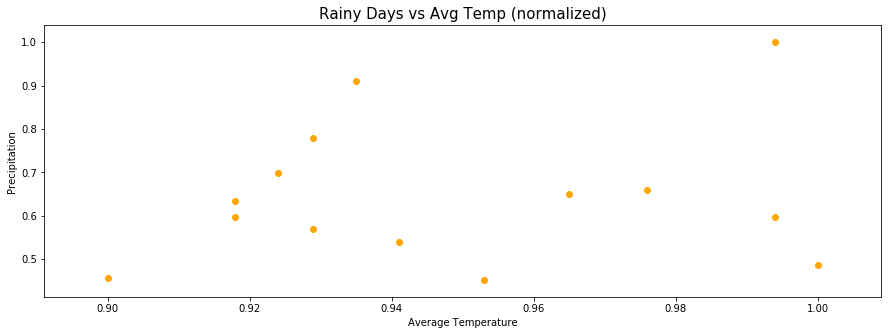

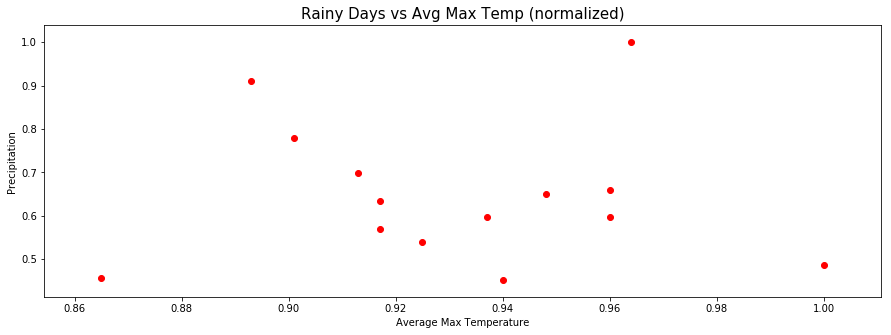

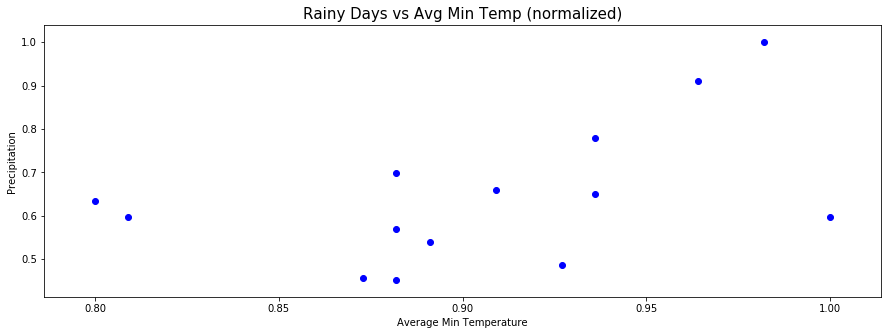

In [36]:
############################################
# avg temp vs precipitation
plt.figure(figsize=(15, 35))

plt.subplot(611)
plt.scatter(weather_pp['T_normed'],weather_pp['PP_normed'], color='orange')

plt.ylabel('Precipitation')
plt.xlabel('Average Temperature')
plt.title('Rainy Days vs Avg Temp (normalized)', fontsize=15)

############################################
# avg max temp vs precipitation
plt.figure(figsize=(15, 35))

plt.subplot(612)
plt.scatter(weather_pp['TM_normed'],weather_pp['PP_normed'], color='red')

plt.ylabel('Precipitation')
plt.xlabel('Average Max Temperature')
plt.title('Rainy Days vs Avg Max Temp (normalized)', fontsize=15)

############################################
# avg max temp vs precipitation
plt.figure(figsize=(15, 35))

plt.subplot(612)
plt.scatter(weather_pp['Tm_normed'],weather_pp['PP_normed'], color='blue')

plt.ylabel('Precipitation')
plt.xlabel('Average Min Temperature')
plt.title('Rainy Days vs Avg Min Temp (normalized)', fontsize=15)

############################################

plt.show()

#### Precipitation per Day of Precipitation vs Temperature Data

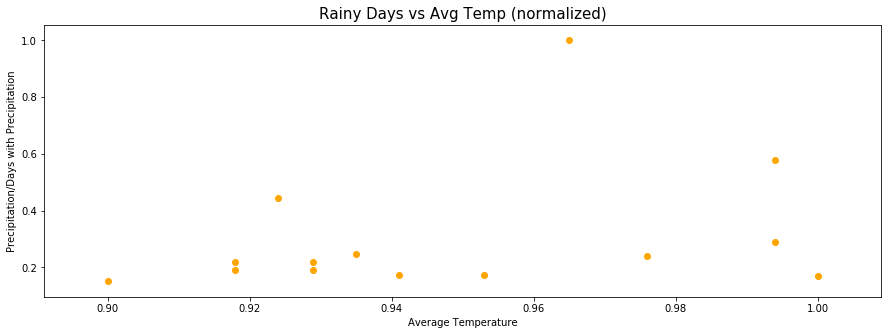

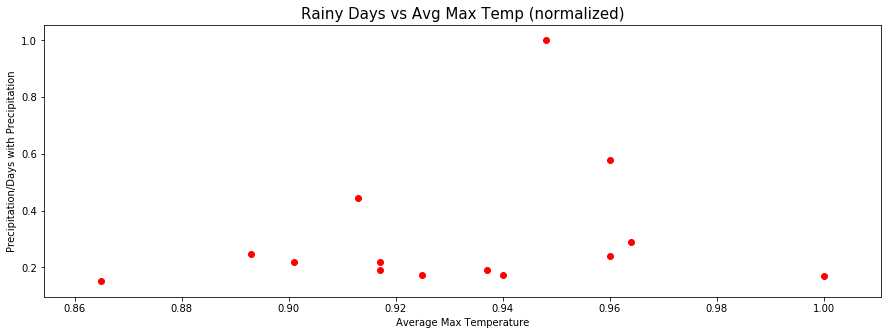

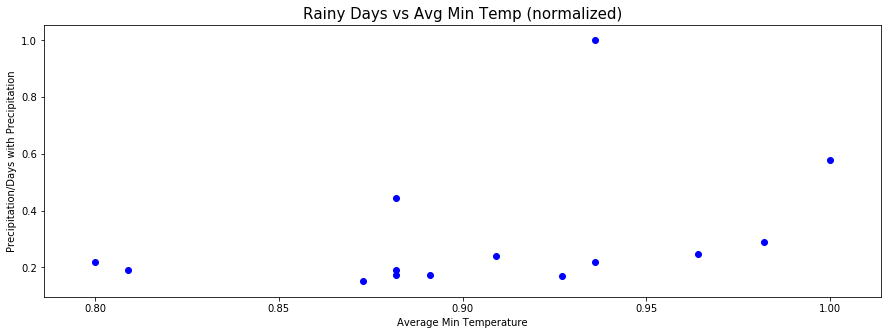

In [37]:
############################################
# avg temp vs PP/PP_days
plt.figure(figsize=(15, 35))

plt.subplot(611)
plt.scatter(weather_pp['T_normed'],weather_pp['PP/PP_days__normed'], color='orange')

plt.ylabel('Precipitation/Days with Precipitation')
plt.xlabel('Average Temperature')
plt.title('Rainy Days vs Avg Temp (normalized)', fontsize=15)

############################################
# avg max temp vs PP/PP_days
plt.figure(figsize=(15, 35))

plt.subplot(612)
plt.scatter(weather_pp['TM_normed'],weather_pp['PP/PP_days__normed'], color='red')

plt.ylabel('Precipitation/Days with Precipitation')
plt.xlabel('Average Max Temperature')
plt.title('Rainy Days vs Avg Max Temp (normalized)', fontsize=15)

############################################
# avg max temp vs PP/PP_days
plt.figure(figsize=(15, 35))

plt.subplot(612)
plt.scatter(weather_pp['Tm_normed'],weather_pp['PP/PP_days__normed'], color='blue')

plt.ylabel('Precipitation/Days with Precipitation')
plt.xlabel('Average Min Temperature')
plt.title('Rainy Days vs Avg Min Temp (normalized)', fontsize=15)

############################################

plt.show()

### Observations

At first glance it appears the number of days with rain may be on the decline each year. However, if we look at a box plot representation of the number of rainy days there seems to be a few outliers:

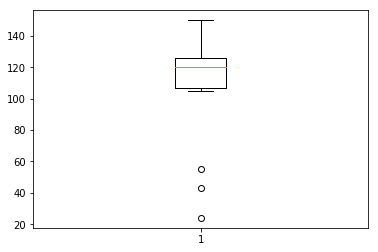

In [52]:
plt.boxplot(weather_pp['RA'])
plt.show()

Interestingly enough, the years that correlate with these ouliers are 2010-2012, the years we see the large dip in the line graph. 

Another important observation to note is that even though the number of rainy days went down those years, the amount of total precipitation stayed relatively the same. 
 - In 2011 we see the greatest dip in days with precipitation but in the amount of precipitation we don't see the same dip. 

There weren't many days with snow in 2011 either (3), so although it didn't rain as many days that year, the data seems to infer that when it did rain it rained alot.
 - If Atlanta were a farm town, this could have implications for crop growths, etc. 
     - Generally, rain is a good thing in the context of growing crops, however, having too 
        much rain in a short period of time can cause a whole other set of 
        problems for farmers. 

Simarly, when we look at the number of days with precipitation, we see the same dip between the years of 2010-2012. Since it doesn't snow very many days in Atlanta, there is little difference between the number of days of precipitation and the number of rainy days. 

When we compare precipitation to various temperature data points could likely be useful if a much larger data set were used. The scatter plots appear to be well spread out but when plotted against the average max temperature they slightly mimic the shape of a parabola, suggesting a possible exponential relationship. 

## Analytical Overview

To recap, we used weather data from Atlanta, Ga between the years of 1997 and 2016 to see a picture of the trends occuring over time. 

Based on our analysis, we have deduced the following trends:
 - Average temperature, average max temperature, and average min temperature all seem to be on the rise.
     - Due to the small values of correlation between the data and their trend lines, however, it is important to note more data is necessary to make definitive conclusions. 

 - There are very few days of snow in Atlanta relative to the number of rainy days so the days it snows has little impact on trends seen in precipitation.
     - At first glance the number of days it rains per year in Atlanta seems to be decreasing. 
         - Due to the considerable drop in number of days it rained between the years of 2010-20112, further analysis was done to test this trend. 
             - The number of days with precipitation decreased during those years, however, the amount of precipitation stayed relatively the same.
             - This suggests more precipitation in a shorter period of time.
             - Since too much rain in a short period of time can have detrimental effects to crops, further analysis could be done to investigate if any such relationships can be found. 
     - Given how far the number of rainy days during the years of 2010-2012 lies outside the normal range, it appears they may be the exception as opposed to the rule. Further analysis including more data should be completed in order to confirm this hypothesis.

## Next Steps

This analysis has loosely confirmed that temperatures have been on the rise in Atlanta since 1997. However, the correlations are small and future analysis should be completed using data from a longer time span. Although the correlations are small, even a small change in the earth's climate can have an impact on our planet. This seems to be evident and is the current hypothesis of many. It should also be noted, though, that the amount of time we have been able to track climate data with such a great scope has been relatively small in comparison to how long we have been on this earth. That said, it is important to study the possible trends associated with our climate and our impact on it. 